In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
sprocket_central = pd.ExcelFile('/Users/zhenliu15471/code/zliu15471/KPMG/raw_data/KPMG_VI_New_raw_data_update_final.xlsx')

df_tra = pd.read_excel(sprocket_central, 'Transactions', header=1)

df_newc = pd.read_excel(sprocket_central, 'NewCustomerList', header=1)

df_demo = pd.read_excel(sprocket_central, 'CustomerDemographic', header=1)

df_add = pd.read_excel(sprocket_central, 'CustomerAddress', header=1)

/var/folders/4y/7vss76ld1rj1ybqx7xpskc5m0000gn/T/ipykernel_81566/2636081817.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_newc = pd.read_excel(sprocket_central, 'NewCustomerList', header=1)
/var/folders/4y/7vss76ld1rj1ybqx7xpskc5m0000gn/T/ipykernel_81566/2636081817.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_demo = pd.read_excel(sprocket_central, 'CustomerDemographic', header=1)


In [3]:
df_tra.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
df_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
df_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
df_newc.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


# Data Exploration 

## new customers 

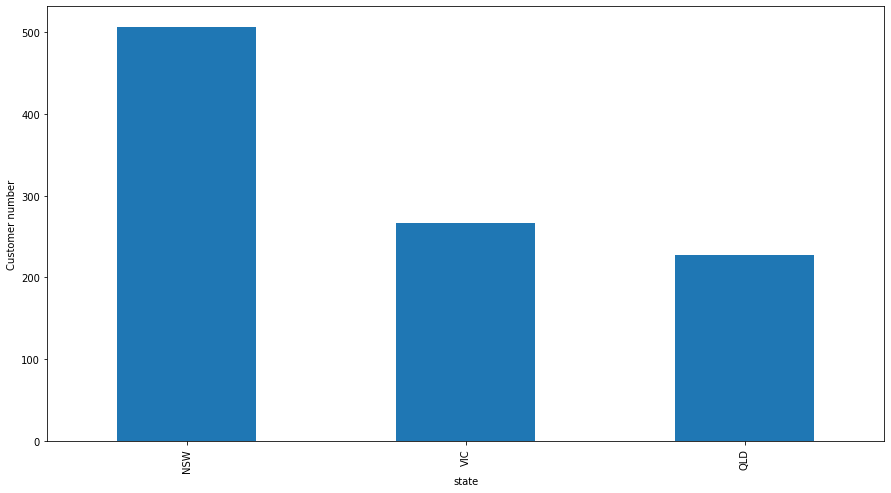

In [7]:
plt.figure(figsize=(15,8))
ax = df_newc.state.value_counts().plot.bar()
ax.set_xlabel("state")
ax.set_ylabel("Customer number");

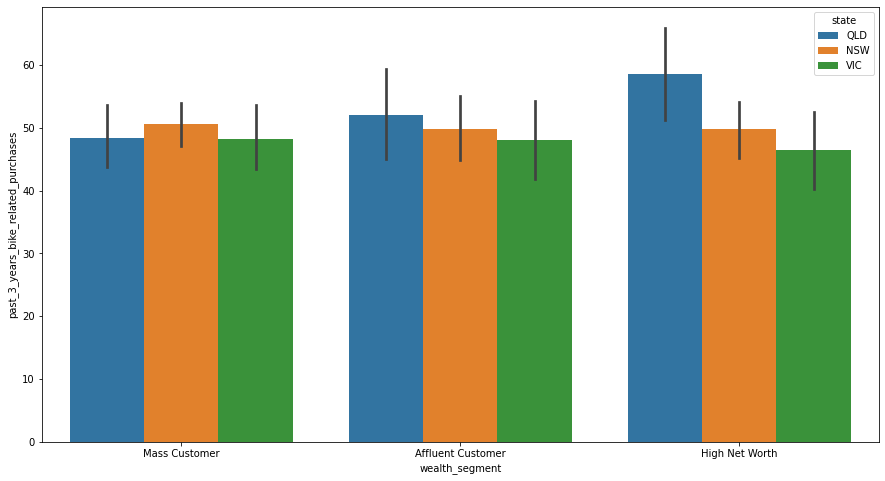

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(data =df_newc, x ='wealth_segment', y = 'past_3_years_bike_related_purchases',hue = 'state' );

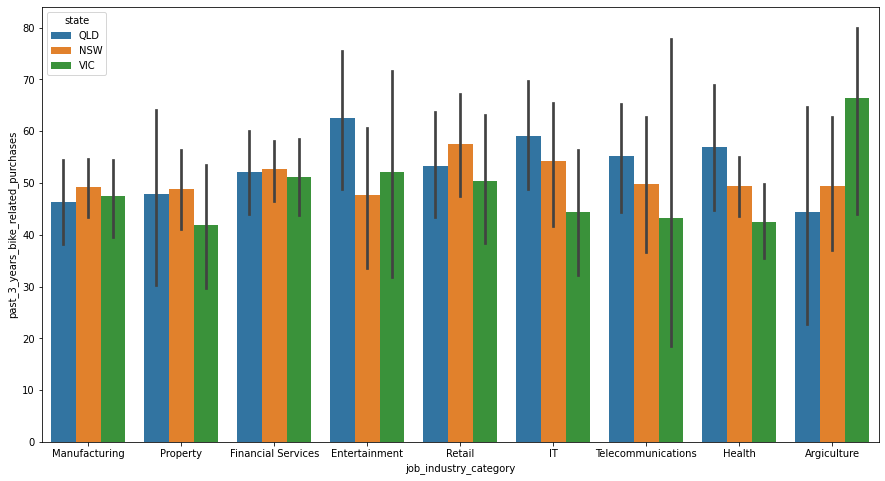

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(data =df_newc, x ='job_industry_category', y = 'past_3_years_bike_related_purchases',hue ='state' );

## Transactions

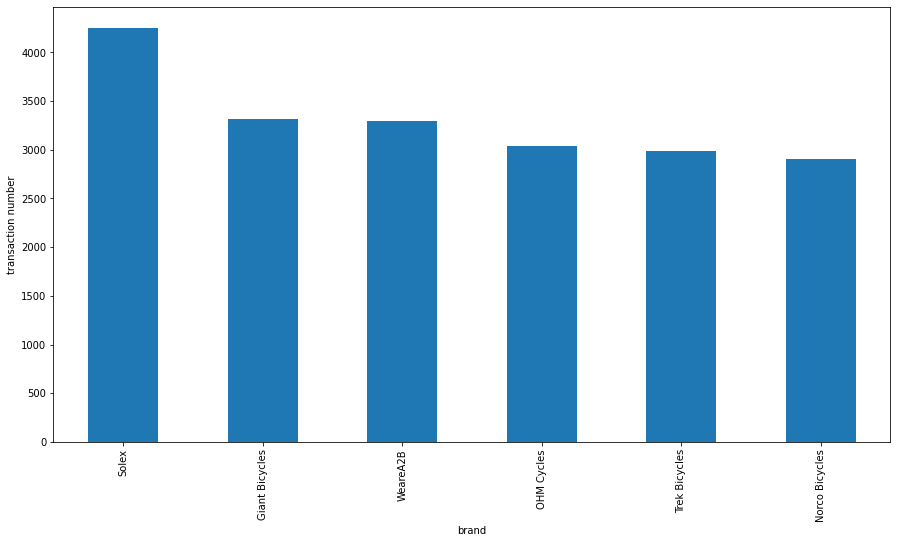

In [10]:
plt.figure(figsize=(15,8))
ax = df_tra.brand.value_counts().plot.bar();
ax.set_xlabel("brand")
ax.set_ylabel("transaction number");

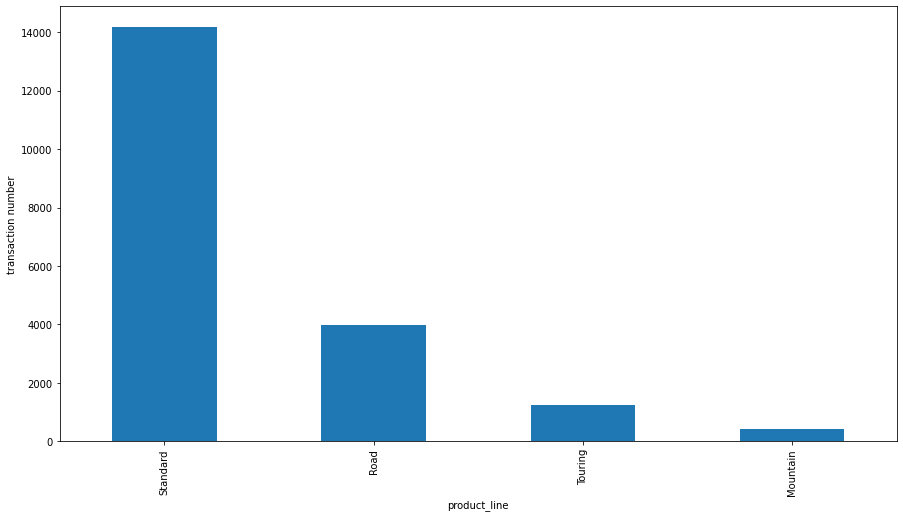

In [11]:
plt.figure(figsize=(15,8))
ax = df_tra.product_line.value_counts().plot.bar();
ax.set_xlabel("product_line")
ax.set_ylabel("transaction number");

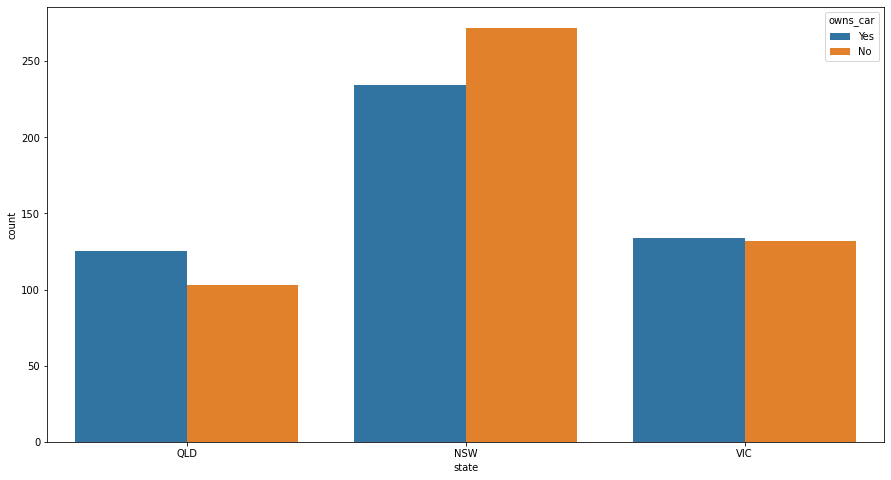

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(data = df_newc, x ='state', hue ='owns_car' );

# Feature Engineering

## drop less important features

In [12]:
df_demo.drop(['first_name','last_name','default','job_title','deceased_indicator'],axis =1, inplace =True)

In [13]:
df_demo = df_demo.dropna()

In [14]:
df_add = df_add.dropna()


## replace the inconsistent features

In [15]:
df_demo['gender'].replace(['F','Femal'],'Female',inplace  =True)
df_demo['gender'].replace('M','Male', inplace = True)
df_demo['gender'].replace('U','Unknown',inplace = True)

In [16]:
df_demo.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0
3,4,Male,33,1961-10-03,IT,Mass Customer,No,7.0
5,6,Male,35,1966-09-16,Retail,High Net Worth,Yes,13.0


In [17]:
df_add['state'].replace('New South Wales','NSW',inplace =True)
df_add['state'].replace('Victoria','VIC',inplace =True)

In [18]:
df_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


## Create new feature 'age' by calculating DOB

In [19]:
df_demo['age'] = (dt.datetime.now()-df_demo['DOB'])/np.timedelta64(1,'Y')

In [20]:
df_demo['age_group'] = ((round(df_demo['age'] / 10)) * 10).astype(int)

In [21]:
df_demo

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,68.948511,70
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,41.769308,40
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0,68.674720,70
3,4,Male,33,1961-10-03,IT,Mass Customer,No,7.0,60.972988,60
5,6,Male,35,1966-09-16,Retail,High Net Worth,Yes,13.0,56.020114,60
...,...,...,...,...,...,...,...,...,...,...
3993,3994,Female,5,1989-04-07,Manufacturing,Affluent Customer,No,12.0,33.462498,30
3994,3995,Male,93,1975-12-12,Manufacturing,Mass Customer,Yes,14.0,46.782416,50
3995,3996,Female,8,1975-08-09,Health,Mass Customer,No,19.0,47.124654,50
3996,3997,Female,87,2001-07-13,Manufacturing,High Net Worth,Yes,1.0,21.196675,20


## data frame join 

In [22]:
df_dd= df_demo.merge(df_add, how = 'inner', on = 'customer_id')

In [23]:
df_dd = df_dd.dropna()

In [24]:
df_dd.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,68.948511,70,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,41.769308,40,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Male,33,1961-10-03,IT,Mass Customer,No,7.0,60.972988,60,0 Holy Cross Court,4211,QLD,Australia,9
3,6,Male,35,1966-09-16,Retail,High Net Worth,Yes,13.0,56.020114,60,9 Oakridge Court,3216,VIC,Australia,9
4,7,Female,6,1976-02-23,Financial Services,Affluent Customer,Yes,11.0,46.582549,50,4 Delaware Trail,2210,NSW,Australia,9


In [25]:
df_dd.drop('DOB',axis = 1, inplace = True)

In [26]:
df_dd.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,Female,93,Health,Mass Customer,Yes,11.0,68.948511,70,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,41.769308,40,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Male,33,IT,Mass Customer,No,7.0,60.972988,60,0 Holy Cross Court,4211,QLD,Australia,9
3,6,Male,35,Retail,High Net Worth,Yes,13.0,56.020114,60,9 Oakridge Court,3216,VIC,Australia,9
4,7,Female,6,Financial Services,Affluent Customer,Yes,11.0,46.582549,50,4 Delaware Trail,2210,NSW,Australia,9


# RFM method

In [31]:
df_tra.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [32]:
df_tra = df_tra.sort_values('customer_id')

In [33]:
df_tra.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [ ]:
df_transactions = df_transactions.dropna(axis=1, how='all')
df_transactions = df_transactions.dropna()